In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\placementdata.csv")

In [3]:
df.head(2)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed


In [4]:
df.drop(columns=df.iloc[:,2:11], inplace=True)

In [5]:
df.head(2)

,StudentID,CGPA,PlacementStatus
0,1,7.5,NotPlaced
1,2,8.9,Placed


In [6]:
df.drop(columns=['StudentID'],inplace=True)

In [7]:
df.head(2)

,CGPA,PlacementStatus
0,7.5,NotPlaced
1,8.9,Placed


In [8]:
df.head()

,CGPA,PlacementStatus
0,7.5,NotPlaced
1,8.9,Placed
2,7.3,NotPlaced
3,7.5,Placed
4,8.3,Placed


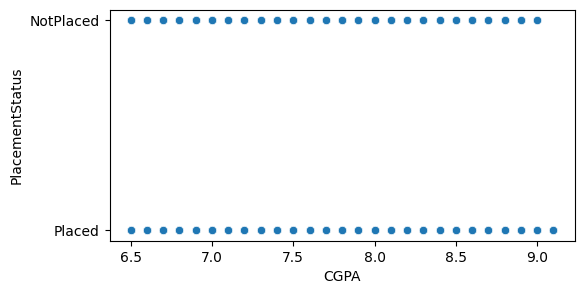

In [9]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='CGPA',y='PlacementStatus')
plt.show()

In [10]:
x = df[['CGPA']]
y = df['PlacementStatus']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [13]:
lr.score(x_test, y_test)*100

73.1

In [14]:
print(lr.predict([[8.9]]))

['Placed']


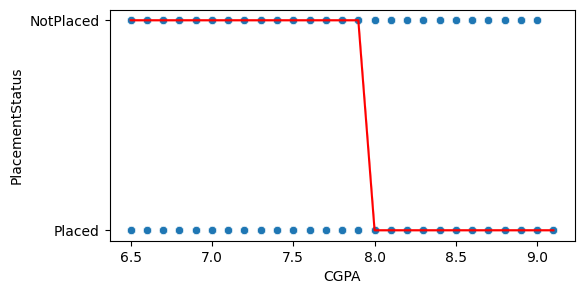

In [15]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='CGPA',y='PlacementStatus')
sns.lineplot(data=df, x='CGPA',y=lr.predict(x), color='red')
plt.show()

In [17]:
import joblib

In [18]:
joblib.dump(lr, 'lr.joblib')

['lr.joblib']

In [19]:
pred = joblib.load('lr.joblib')

In [21]:
pred.predict()

array(['Placed'], dtype=object)